<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/43_data_science_libs/hw09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа № 9

Использование алгоритмов понижения размерности для улучшения классификации новостей

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей
(датасет '20 Newsgroups' доступный в sklearn.datasets).

Задачи:

1. Загрузите датасет '20 Newsgroups' из sklearn.

2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).

3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:
— PCA (Principal Component Analysis)
— t-SNE (t-distributed Stochastic Neighbor Embedding)
— UMAP (Uniform Manifold Approximation and Projection).

4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.

5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.

6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.

7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.

In [1]:
!pip install umap-learn[plot] -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.6 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [19]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [21]:
df = pd.DataFrame(dict(text=data.data, target=data.target))

In [5]:
df.head(3)

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17


Выведем данные о категориях

In [22]:
category_labels = [data.target_names[i] for i in data.target]

In [6]:
df.shape

(18846, 2)

In [7]:
df.isna().sum()

,0
text,0
target,0


Очистим текст от символов форматирования

In [8]:
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].str.replace('\t', '')

In [9]:
df.head(3)

,text,target
0,I am sure some bashers of Pens fans are pretty...,10
1,My brother is in the market for a high-perform...,3
2,Finally you said what you dream about. Mediter...,17


Удалим стоп-слова

In [10]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (ENGLISH_STOP_WORDS)]))

Преобразуем тексты в веторы

In [14]:
vectors = TfidfVectorizer(max_features=5_000).fit_transform(df['text']).toarray()

Применим метод понижения размерности PCA

In [15]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(vectors)

Оценим результаты

In [16]:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f'PCA - Total Explained Variance (information retained): {total_explained_variance:.2f}')

PCA - Total Explained Variance (information retained): 0.01


Результат означает, что только 1% информации сохранено после применение метода понижения размерности.
<br>
Что достаточно объяснимо, поскольку мы применяли линейный метод понижения размерности для текстов,
<br>
обладающих сложными нелинейными зависимостями. Кроме того, мы ограничились 5000 токенами, что не добавило информации.

Визуализация PCA

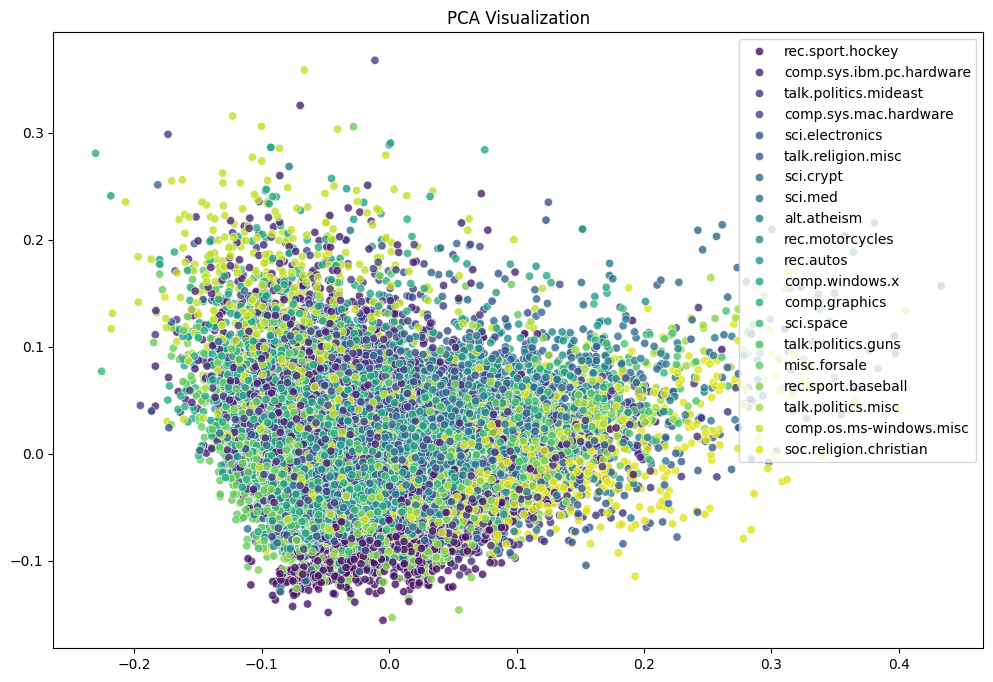

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=category_labels, palette='viridis', legend='full', alpha=0.8)
plt.title('PCA Visualization')
plt.show()

# Применим метод t-SNE

In [26]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(vectors)

Оценим результат методом оценки сохранения соседей

In [27]:
from sklearn.manifold import trustworthiness

trust = trustworthiness(vectors, tsne_result, n_neighbors=5)
print(f'Trustworthiness: {trust}')

Trustworthiness: 0.6274997744640127


Результат тем лучше, чем ближе к 1. Наш результат достаточно приличный

Визуализация

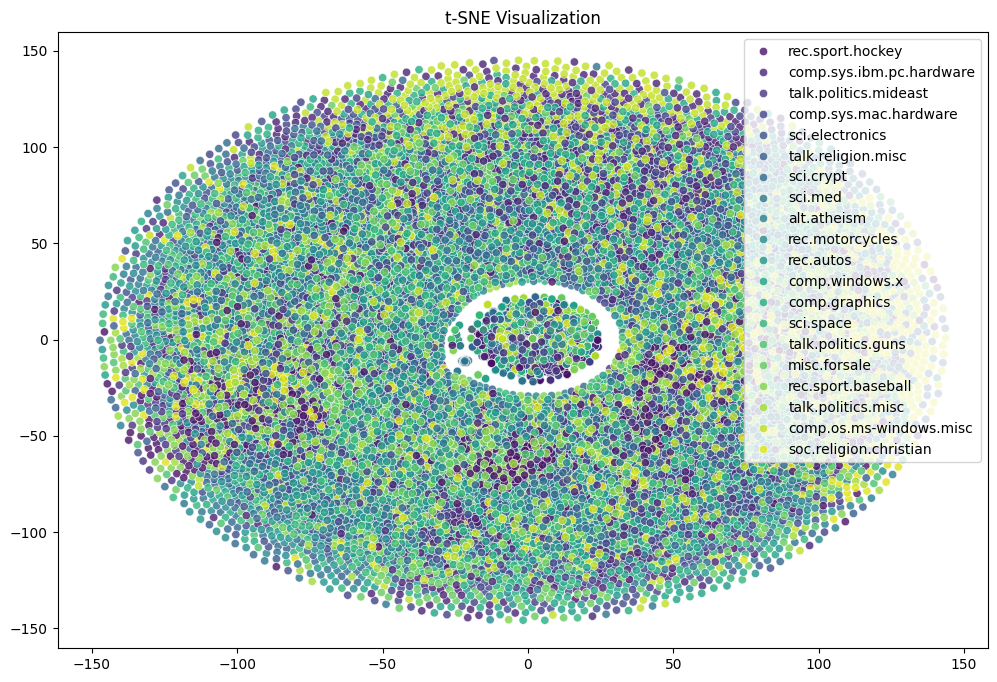

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=category_labels, palette='viridis', legend='full', alpha=0.8)
plt.title('t-SNE Visualization')
plt.show()

# Метод UMAP

In [31]:
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(vectors)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Визуализация

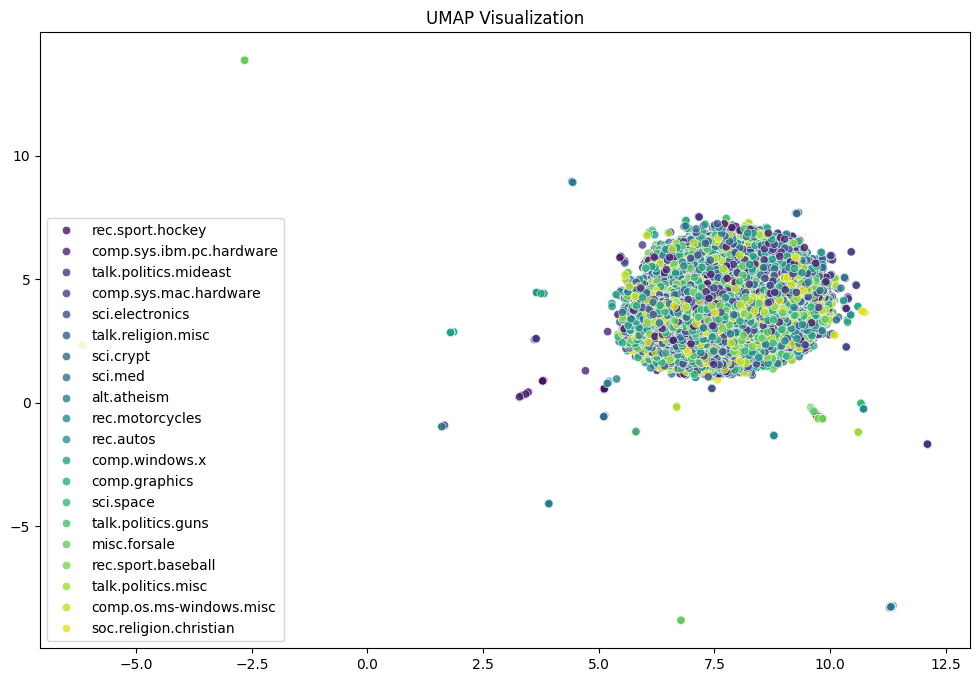

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=category_labels, palette='viridis', legend='full', alpha=0.8)
plt.title('UMAP Visualization')
plt.show()

Применим метод МО Наивный Байес (Multinomial Naive Bayes) для классификации новостей по теме

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [38]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
y_pred = nb_model.predict(X_test_tfidf)

Оценим качество модели

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.6788114609126282

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.62      0.43      0.51       236
           comp.graphics       0.56      0.66      0.61       287
 comp.os.ms-windows.misc       0.64      0.67      0.65       290
comp.sys.ibm.pc.hardware       0.55      0.69      0.61       285
   comp.sys.mac.hardware       0.76      0.57      0.65       312
          comp.windows.x       0.80      0.74      0.77       308
            misc.forsale       0.69      0.68      0.69       276
               rec.autos       0.74      0.70      0.72       304
         rec.motorcycles       0.44      0.76      0.56       279
      rec.sport.baseball       0.85      0.80      0.82       308
        rec.sport.hockey       0.88      0.88      0.88       309
               sci.crypt       0.75      0.73      0.74       290
         sci.electronics       0.68      0.56      0.61       304
                 sci.

Результаты достаточно хороши!
<br>
Небольшая демонстрация

In [46]:
text = """
Skylab 4 astronauts Gerald P. Carr, Edward G. Gibson, and William R. Pogue hold the distinction as the first crew to celebrate Thanksgiving in space on Nov. 22, 1973.
On that day, their seventh of an 84-day mission, Gibson and Pogue completed a 6-hour and 33-minute spacewalk, while Carr remained in the Multiple Docking Adapter, with no access to food.
All three made up for missing lunch by consuming two meals at dinner time, although neither included special items for Thanksgiving.
"""

In [47]:
text_tfidf = tfidf_vectorizer.transform([text])
y_pred = nb_model.predict(text_tfidf)
print("Predicted Category:", data.target_names[y_pred[0]])

Predicted Category: sci.space


In [60]:
text = """
The Israel Defence Forces (IDF) say on Friday morning they "conducted an intelligence-based strike on military infrastructure sites adjacent to border crossings between Syria and Lebanon."
The IDF alleges the crossings were being used to smuggle weapons into Lebanon.
UK-based human rights group the Syrian Observatory of Human Rights say that the airstrikes hit legal crossings and border bridges.
Many people living in Lebanon took refuge in Syria during the Israel-Hezbollah conflict, and people are now crossing the border to return home since a ceasefire between Israel and Hezbollah was announced.
"""

In [45]:
X_train_tfidf = tfidf_vectorizer.transform([text])
y_pred = nb_model.predict(X_train_tfidf)
print("Predicted Category:", data.target_names[y_pred[0]])

Predicted Category: talk.politics.mideast


Попробуем добиться похожего результата с помощью модели с пониженной размерностью

In [55]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(pca_result)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.target, test_size=0.3, random_state=42)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.10187477891758047

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       236
           comp.graphics       0.00      0.00      0.00       287
 comp.os.ms-windows.misc       0.30      0.41      0.35       290
comp.sys.ibm.pc.hardware       0.19      0.34      0.24       285
   comp.sys.mac.hardware       0.00      0.00      0.00       312
          comp.windows.x       0.00      0.00      0.00       308
            misc.forsale       0.04      0.02      0.02       276
               rec.autos       0.00      0.00      0.00       304
         rec.motorcycles       0.06      0.98      0.12       279
      rec.sport.baseball       0.00      0.00      0.00       308
        rec.sport.hockey       0.00      0.00      0.00       309
               sci.crypt       0.00      0.00      0.00       290
         sci.electronics       0.00      0.00      0.00       304
                 sci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Результаты ожидаемо похуже. Посмотрим, что получится на реальных данных из случайной газеты

In [63]:
text = """
The Israel Defence Forces (IDF) say on Friday morning they "conducted an intelligence-based strike on military infrastructure sites adjacent to border crossings between Syria and Lebanon."
The IDF alleges the crossings were being used to smuggle weapons into Lebanon.
UK-based human rights group the Syrian Observatory of Human Rights say that the airstrikes hit legal crossings and border bridges.
Many people living in Lebanon took refuge in Syria during the Israel-Hezbollah conflict, and people are now crossing the border to return home since a ceasefire between Israel and Hezbollah was announced.
"""

In [65]:
text_tfidf = tfidf_vectorizer.transform([text])

text_pca = pca.transform(text_tfidf.toarray())

text_scaled = scaler.transform(text_pca)

predicted_class = nb_model.predict(text_scaled)

print("Predicted Category:", data.target_names[y_pred[0]])

Predicted Category: rec.motorcycles


Полученная категория - Мотоциклисты.

Попробуем модель tsne

In [69]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(tsne_result)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.target, test_size=0.3, random_state=42)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.06437920056597099

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       236
           comp.graphics       0.00      0.00      0.00       287
 comp.os.ms-windows.misc       0.08      0.11      0.09       290
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       285
   comp.sys.mac.hardware       0.00      0.00      0.00       312
          comp.windows.x       0.00      0.00      0.00       308
            misc.forsale       0.00      0.00      0.00       276
               rec.autos       0.00      0.00      0.00       304
         rec.motorcycles       0.05      0.65      0.09       279
      rec.sport.baseball       0.00      0.00      0.00       308
        rec.sport.hockey       0.00      0.00      0.00       309
               sci.crypt       0.00      0.00      0.00       290
         sci.electronics       0.00      0.00      0.00       304
                 sci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Попробуем метод UMAP

Результаты еще хуже.
<br>
Повторить трюк с реальными случайными данными не получится, поскольку t-SNE не сохраняет преобразования и не моет быть использоват "на лету"

In [72]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(umap_result)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.target, test_size=0.3, random_state=42)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.04934559603820304

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       236
           comp.graphics       0.00      0.00      0.00       287
 comp.os.ms-windows.misc       0.00      0.00      0.00       290
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       285
   comp.sys.mac.hardware       0.00      0.00      0.00       312
          comp.windows.x       0.00      0.00      0.00       308
            misc.forsale       0.00      0.00      0.00       276
               rec.autos       0.00      0.00      0.00       304
         rec.motorcycles       0.05      1.00      0.09       279
      rec.sport.baseball       0.00      0.00      0.00       308
        rec.sport.hockey       0.00      0.00      0.00       309
               sci.crypt       0.00      0.00      0.00       290
         sci.electronics       0.00      0.00      0.00       304
                 sci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Результаты еще хуже..

# Выводы
Методы понижения размерности - можный инструмент оптимизации моделей машинного обучения, однако, они должны применяться со знанием дела, поскольку потеря информации при понижении размерностиможет быть значительной, что может привести к невозможности использования обученной модели на практике
<br>
В данной работе применение линейных методов понижения размерности (PCA) к нелинейным сущностям (тексты) привел к практически полной потере информации